In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

LOADING OF DATASET

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\fakenewsdataset.csv")

BASIC INFORMATION OF DATASET

In [4]:
df.shape

(44954, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44954 entries, 0 to 44953
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44902 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44884 non-null  object
 4   level    44954 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [6]:
df.head()

,title,text,subject,date,level
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,12/31/2017,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,12/31/2017,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,12/30/2017,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,12/29/2017,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,12/25/2017,0


In [7]:
df.columns

Index(['title', 'text', 'subject', 'date', 'level'], dtype='object')

CHECK THE DATA IS BALANCED OR NOT

In [8]:
df['level'].value_counts()

level
0    23537
1    21417
Name: count, dtype: int64

In [9]:
level_counts = df['level'].value_counts()

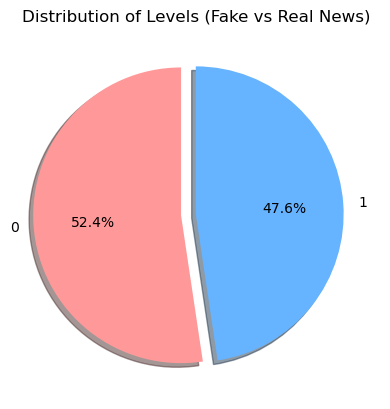

In [10]:
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], explode=(0.1, 0), shadow=True)
plt.title('Distribution of Levels (Fake vs Real News)')
plt.show()

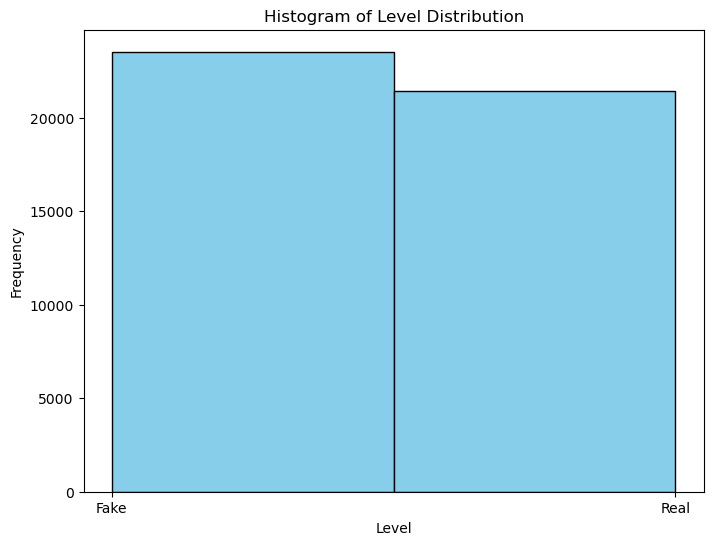

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['level'], bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of Level Distribution')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

SO THE DATA IS BALANCED

REMOVE THE DUPLICATE ROWS 

In [12]:
df.shape

(44954, 5)

In [13]:
# Remove duplicates based on the 'text' column 
df_cleaned = df.drop_duplicates(subset=['text'])
#reset the index after dropping duplicates
df_cleaned = df_cleaned.reset_index(drop=True)

In [14]:
df_cleaned.shape

(38647, 5)

In [15]:
df_cleaned

,title,text,subject,date,level
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,12/31/2017,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,12/31/2017,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,12/30/2017,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,12/29/2017,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,12/25/2017,0
...,...,...,...,...,...
38642,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,8/22/2017,1
38643,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,8/22/2017,1
38644,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,8/22/2017,1
38645,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,8/22/2017,1


FINDING AND REMOVING THE MISSING VALUES

In [16]:
df_cleaned.isnull().sum()

title       1
text        1
subject     1
date       11
level       0
dtype: int64

In [17]:
df_cleaned.isnull().sum().sum()

14

In [18]:
df_cleaned = df_cleaned.dropna()

In [19]:
df_cleaned.isnull().sum().sum()

0

In [20]:
df_cleaned.shape


(38636, 5)

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38636 entries, 0 to 38646
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38636 non-null  object
 1   text     38636 non-null  object
 2   subject  38636 non-null  object
 3   date     38636 non-null  object
 4   level    38636 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


PREPROCESSING

In [22]:
df_cleaned.shape

(38636, 5)

Convert Text to Lowercase

In [24]:
# Convert the 'text' to lowercase
df_cleaned['text'] = df_cleaned['text'].str.lower()

# Display the DataFrame to see the changes
df_cleaned.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9312\1360993801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text'] = df_cleaned['text'].str.lower()


,title,text,subject,date,level
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,12/31/2017,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,12/31/2017,0
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,12/30/2017,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,12/29/2017,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,12/25/2017,0


Remove Special Characters and Punctuation 

In [26]:
df_cleaned['text'] = df_cleaned['text'].str.lower()

# Step 2: Remove special characters and punctuation
df_cleaned['text'] = df_cleaned['text'].apply(lambda text: re.sub(r'[^A-Za-z0-9\s]', '', text) if isinstance(text, str) else text)

# Display the DataFrame to see the changes
df_cleaned.tail()

C:\Users\hp\AppData\Local\Temp\ipykernel_9312\377854034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text'] = df_cleaned['text'].str.lower()
C:\Users\hp\AppData\Local\Temp\ipykernel_9312\377854034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text'] = df_cleaned['text'].apply(lambda text: re.sub(r'[^A-Za-z0-9\s]', '', text) if isinstance(text, str) else text)


,title,text,subject,date,level
38642,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday welco...,worldnews,8/22/2017,1
38643,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of legal...,worldnews,8/22/2017,1
38644,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused soviet...,worldnews,8/22/2017,1
38645,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state car...,worldnews,8/22/2017,1
38646,Indonesia to buy $1.14 billion worth of Russia...,jakarta reuters indonesia will buy 11 sukhoi ...,worldnews,8/22/2017,1


Tokenization

Remove Stopwords 